In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("shopping_data.csv")

In [3]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# kmeans clustering

In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
finaldata = data.iloc[:, 2:5]
finaldata

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [6]:
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [7]:
finaldata.shape

(200, 3)

In [8]:
finaldata.size

600

In [9]:
finaldata.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

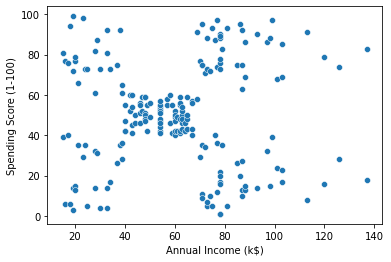

In [10]:
sns.scatterplot(x=finaldata.iloc[:,1], y = finaldata.iloc[:,2])

In [11]:
# building the Kmeans model

from sklearn.cluster import KMeans
clust = KMeans(n_clusters=3, random_state=1)

In [12]:
clust.fit(finaldata)

KMeans(n_clusters=3, random_state=1)

In [13]:
clust.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [14]:
# check the centroid

print("the centroid is ")
print(clust.cluster_centers_)

the centroid is 
[[40.39473684 87.         18.63157895]
 [40.32520325 44.15447154 49.82926829]
 [32.69230769 86.53846154 82.12820513]]


In [15]:
finaldata["Clusterlabel"]= clust.labels_
finaldata   # append the label

,Age,Annual Income (k$),Spending Score (1-100),Clusterlabel
0,19,15,39,1
1,21,15,81,1
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1
...,...,...,...,...
195,35,120,79,2
196,45,126,28,0
197,32,126,74,2
198,32,137,18,0


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

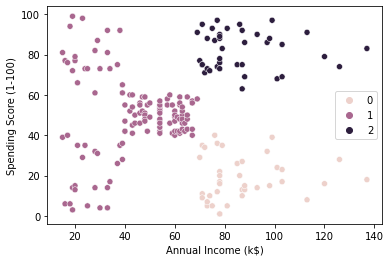

In [16]:
# check the plot with the three groups
sns.scatterplot(x=finaldata.iloc[:,1], y = finaldata.iloc[:,2], hue =clust.labels_)

In [17]:
finaldata["Clusterlabel"].value_counts()

1    123
2     39
0     38
Name: Clusterlabel, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


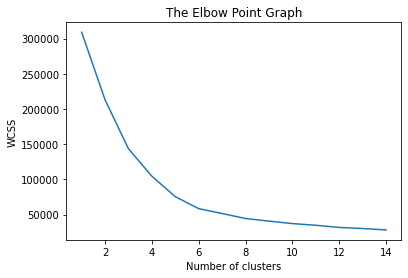

In [21]:
#finding WSS
wcss = []
for i in range(1,15):
    kmeans1 = KMeans(n_clusters = i)
    kmeans1.fit(finaldata)
   #appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
    wcss.append(kmeans1.inertia_)  
    
#Plotting The Elbow graph
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
# building the Kmeans model

from sklearn.cluster import KMeans
clust = KMeans(n_clusters=5, random_state=1)

In [24]:
clust.fit(finaldata)

KMeans(n_clusters=5, random_state=1)

In [25]:
clust.labels_

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 4, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [26]:
# check the centroid

print("the centroid is ")
print(clust.cluster_centers_)

the centroid is 
[[4.06666667e+01 8.77500000e+01 1.75833333e+01 4.44089210e-16]
 [2.55217391e+01 2.63043478e+01 7.85652174e+01 1.00000000e+00]
 [3.26923077e+01 8.65384615e+01 8.21282051e+01 2.00000000e+00]
 [4.52173913e+01 2.63043478e+01 2.09130435e+01 1.00000000e+00]
 [4.30886076e+01 5.52911392e+01 4.95696203e+01 9.74683544e-01]]


In [27]:
finaldata["Clusterlabel"]= clust.labels_
finaldata   # append the label

,Age,Annual Income (k$),Spending Score (1-100),Clusterlabel
0,19,15,39,3
1,21,15,81,1
2,20,16,6,3
3,23,16,77,1
4,31,17,40,3
...,...,...,...,...
195,35,120,79,2
196,45,126,28,0
197,32,126,74,2
198,32,137,18,0


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

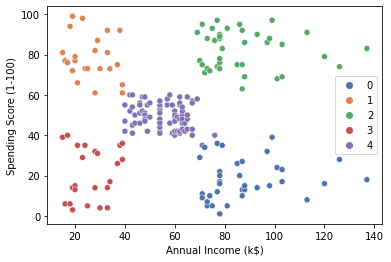

In [31]:
# check the plot with the three groups
sns.scatterplot(x=finaldata.iloc[:,1], y = finaldata.iloc[:,2], 
                hue =clust.labels_, palette = "deep")

In [32]:
finaldata["Clusterlabel"].value_counts()

4    79
2    39
0    36
3    23
1    23
Name: Clusterlabel, dtype: int64